Coordinates of hexagonal grid points:
Point 1: Aa, Latitude: 31.3964, Longitude: 75.5351
Point 2: Ab, Latitude: 31.3964, Longitude: 75.5351
Point 3: Ac, Latitude: 31.3964, Longitude: 75.5351
Point 4: Ad, Latitude: 31.3964, Longitude: 75.5351
Point 5: Ae, Latitude: 31.3964, Longitude: 75.5351
Point 6: Af, Latitude: 31.3964, Longitude: 75.5351
Point 7: Ba, Latitude: 31.3964, Longitude: 76.58752726313637
Point 8: Bb, Latitude: 32.17438056738729, Longitude: 76.06131363156818
Point 9: Bc, Latitude: 32.17438056738729, Longitude: 75.00888636843182
Point 10: Bd, Latitude: 31.3964, Longitude: 74.48267273686363
Point 11: Be, Latitude: 30.61841943261271, Longitude: 75.00888636843182
Point 12: Bf, Latitude: 30.61841943261271, Longitude: 76.06131363156818
Point 13: Ca, Latitude: 31.3964, Longitude: 77.63995452627273
Point 14: Cb, Latitude: 32.2947345800107, Longitude: 77.35795749102284
Point 15: Cc, Latitude: 32.95236113477458, Longitude: 76.58752726313637
Point 16: Cd, Latitude: 33.193069160021395

<ipython-input-2-6c7b77294bdb>:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', num_rings)  # Get a colormap with the number of rings


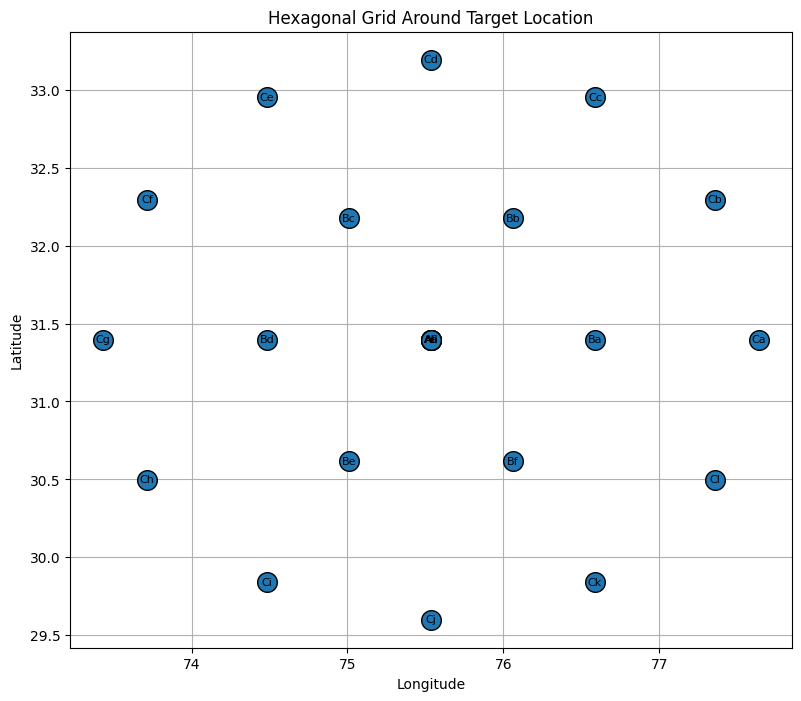

In [ ]:
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def lat_lon_to_xy(lat, lon, center_lat, center_lon):
    earth_radius = 6378  # Radius of the Earth in kilometers
    x = earth_radius * math.radians(lon - center_lon) * math.cos(math.radians(center_lat))
    y = earth_radius * math.radians(lat - center_lat)
    return x, y

def xy_to_lat_lon(x, y, center_lat, center_lon):
    earth_radius = 6378  # Radius of the Earth in kilometers
    lon = math.degrees(x / (earth_radius * math.cos(math.radians(center_lat)))) + center_lon
    lat = math.degrees(y / earth_radius) + center_lat
    return lat, lon

def hexagonal_grid(target_lat, target_lon, grid_radius_km, num_rings):
    grid = []
    center_x, center_y = lat_lon_to_xy(target_lat, target_lon, target_lat, target_lon)
    for ring in range(num_rings):
        num_points = 6 if ring < num_rings - 1 else 12  # 6 points for inner rings, 12 for outermost ring
        for i in range(num_points):
            angle_deg = 360 / num_points * i
            angle_rad = math.radians(angle_deg)
            x = center_x + grid_radius_km * ring * math.cos(angle_rad)
            y = center_y + grid_radius_km * ring * math.sin(angle_rad)
            lat, lon = xy_to_lat_lon(x, y, target_lat, target_lon)
            ring_name = get_ring_name(ring)
            sub_name = get_sub_name(i)
            grid.append((ring_name + sub_name, lat, lon))  # Include ring number in the tuple
    return grid

def get_ring_name(ring_number):
    ring_names = ["A", "B", "C", "D", "E", "F"]
    if ring_number < len(ring_names):
        return ring_names[ring_number]
    else:
        return f"Ring {ring_number + 1}"

def get_sub_name(index):
    sub_names = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l"]
    return sub_names[index]

def plot_hexagonal_grid(grid_coords):
    num_rings = len(set([ring for ring, _, _ in grid_coords]))  # Count the number of unique rings
    cmap = plt.cm.get_cmap('tab10', num_rings)  # Get a colormap with the number of rings

    plt.figure(figsize=(10, 8))
    for ring, lat, lon in grid_coords:
        color = cmap(get_ring_index(ring))  # Get color from colormap based on ring name
        plt.scatter(lon, lat, s=200, color=color, edgecolors='black', zorder=2)
    for ring, lat, lon in grid_coords:
        plt.text(lon, lat, f'{ring}', fontsize=8, ha='center', va='center', zorder=3)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Hexagonal Grid Around Target Location')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def get_ring_index(ring):
    ring_names = ["A", "B", "C", "D", "E", "F"]
    if ring[0] in ring_names:
        return ring_names.index(ring[0])
    else:
        return 0

# Example usage
target_lat = 31.3964  # Target location latitude (e.g., Los Angeles)
target_lon = 75.5351 # Target location longitude
grid_radius_km = 100  # Distance between center of hexagons in kilometers
num_rings = 3 # Number of rings around the target location

hexagonal_grid_coords = hexagonal_grid(target_lat, target_lon, grid_radius_km, num_rings)

print("Coordinates of hexagonal grid points:")
for i, (ring, lat, lon) in enumerate(hexagonal_grid_coords):
    print(f"Point {i+1}: {ring}, Latitude: {lat}, Longitude: {lon}")

plot_hexagonal_grid(hexagonal_grid_coords)
